# Gaussian elimination and LU decomposition

Say we want to compute the solution of
$$Ax = b$$
for the vector $x$. We learn how to do this by transforming it to the problem of solving
$$U x = y$$
where $U$ is an upper-triangular matrix obtained by performing Gaussian elimiantion on $A$ and $y$ is obtained by performing the same operations on $b$. We can then use back substitution to solve $Ux=y$ more easily than solving $Ax=b$ directly.

This approach is directly related to the LU decomposition of a matrix, where we wish to factor a matrix $A$ into a product of a lower triangular matrix $L$ and an upper triangular matrix $U$ to give $A = LU$. To understand how to compute the LU decomposition of a matrix, let us start by reminding ourselves of how to do Gaussian elimination.

## Gaussian elimination by hand

To start, consider the following 3x3 matrix
$$ A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 10 \end{bmatrix}$$

1. Use Gaussian elimination to transform this by hand to an upper triangular matrix $U$ (in row echelon form). Record each elementary row operation you perform along the way.

2. Apply the same sequence of row operations to the vector
$$b = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$$
to obtain the transformed vector $y$.

3. Use back substitution to solve $U x = y$.

## Gaussian elimination in Python

We will now transform the previous algorithm into Python code. First of all define the matrix $A$ and the vector $b$:

In [20]:
import numpy as np

A = np.array([[1,2,3],[4,5,6],[7,8,10]])
b = np.array([[1],[2],[3]])
n = 3

In [22]:
A[1,:]

array([4, 5, 6])

Now perform Gaussian elimination and store the result in a matrix $U$ and a vector $y$. Keep track of the multiplication factors for each step in a matrix $L$.

In [23]:
U = np.array(A, dtype=float)
y = np.array(b, dtype=float)
L = np.identity(n)

# loop over columns and transform to get zeros below the pivot
for k in range(0,n):
    # loop over all rows below the pivot
    for i in range(k + 1, n):
        # Store the multiplication factors in the matrix L
        L[i,k] = U[i,k] / U[k,k]

        # Subtract a multiple of row k from row i
        # for j in range(k, n):
        #    U[i,j] = U[i,j] - L[i,k] * U[k,j]
        U[i,:] = U[i,:] - L[i,k] * U[k,:]
        y[i] = y[i] - L[i,k] * y[k]

In [24]:
L

array([[1., 0., 0.],
       [4., 1., 0.],
       [7., 2., 1.]])

In [25]:
U

array([[ 1.,  2.,  3.],
       [ 0., -3., -6.],
       [ 0.,  0.,  1.]])

In [26]:
y

array([[ 1.],
       [-2.],
       [ 0.]])

**Observation:** it is easy to check that $y$ can be obtained as the solution of the system $Ly=b$

In [27]:
print(np.linalg.solve(L,b))

[[ 1.0000000e+00]
 [-2.0000000e+00]
 [-4.4408921e-16]]


If we consider how many operations this took, there are: ($n$ iterations of the outer loop) x ($n-(k+1)$) iterations of the inner loop) x (n multiplications for the subtraction). This means we require $\mathcal{O}(n^3)$ operations for the Gaussian elimination step.

Let us now solve for $x$ using back substitution on $U x = y$.

In [32]:
x = np.zeros(n)

# Start with the last entry in x
x[n-1] = y[n-1]/U[n-1,n-1]
    
# Iterate upwards from the second last entry to the first entry
for i in range(n-2,-1,-1):
    # Subtract all of the previously computed values from y, then divide by U[i,i]
    x[i] = (y[i] - U[i,i+1:n]@x[i+1:n])/U[i,i]

In [33]:
x

array([-0.33333333,  0.66666667,  0.        ])

In [34]:
A@x

array([1., 2., 3.])

We can check that our original matrix is given by $A=LU$:

In [35]:
L@U

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8., 10.]])

## Gaussian elimination by matrix multiplication

We could consider each of the steps in Gaussian elimination in terms of multiplication on the left by a sequence of *elementary elimination matrices*. These come in three forms:

1. Multiplying row $i$ by a scalar $c$: $\mathbf{r}_i \to c\, \mathbf{r}_i$. This is equivalent to pre-multiplying by a matrix with $1$'s along the diagonal and c in the $i$-th diagonal,$$E_1(i, c) = \begin{bmatrix}
  1 &        &   &   &   &        &   \\
    & \ddots &   &   &   &        &   \\
    &        & 1 &   &   &        &   \\
    &        &   & c &   &        &   \\
    &        &   &   & 1 &        &   \\
    &        &   &   &   & \ddots &   \\
    &        &   &   &   &        & 1
\end{bmatrix}$$
Note that the inverse is given by $E_1(c)^{-1} = E_1(c^{-1})$.

2. Add a multiple $c$ of row $j$ to row $i$: $\mathbf{r}_i \to \mathbf{r}_i  + c\, \mathbf{r}_j$. This is equivalent to premultiplying by a matrix with $1$'s along the diagonal and $c$ in $(i, j)$-th entry:
$$E_2(i,j,c) = \begin{bmatrix}
  1 &        &   &        &   &        &   \\
    & \ddots &   &        &   &        &   \\
    &        & 1 &        &   &        &   \\
    &        &   & \ddots &   &        &   \\
    &        & c &        & 1 &        &   \\
    &        &   &        &   & \ddots &   \\
    &        &   &        &   &        & 1
\end{bmatrix}$$
In this case the inverse is given by $E_2(c)^{-1} = E_2(-c)$.

3. Interchanging rows $i$ and $j$: $\mathbf{r}_i \leftrightarrow \mathbf{r}_j$. This is equivalent to pre-multiplying by a matrix which is the identity with rows $i$ and $j$ swapped: $$E_3(i,j) = \begin{bmatrix}
  1 &        &   &        &   &        &   \\
    & \ddots &   &        &   &        &   \\
    &        & 0 &        & 1 &        &   \\
    &        &   & \ddots &   &        &   \\
    &        & 1 &        & 0 &        &   \\
    &        &   &        &   & \ddots &   \\
    &        &   &        &   &        & 1
\end{bmatrix}$$
In this case the $E_3$ is a permutation matrix and it is its own inverse $E_3^{-1} = E_3$.

Let's work out the sequence of elimination matrices we need to perform the Gaussian elimination from the previous example. First, we define Python functions produce each of the three types of elimination matrix:

In [36]:
def E1(i,c):
    e1 = np.identity(n)
    e1[i, i] = c
    return e1

def E2(i,j,c):
    e2 = np.identity(n)
    e2[i, j] = c
    return e2

def E3(i,j):
    e3 = np.identity(n)
    e3[i, i] = 0
    e3[j, j] = 0
    e3[i, j] = 1
    e3[j, i] = 1
    return e3

Now, we can see that the Gaussian elimination steps correspond to
$$ U = E_2(2,1,-2) E_2(2,0,-7) E_2(1,0,-4) A$$
Apply these in turn (from right to left):

In [37]:
E2(1,0,-4)@A

array([[ 1.,  2.,  3.],
       [ 0., -3., -6.],
       [ 7.,  8., 10.]])

In [38]:
E2(2,0,-7)@E2(1,0,-4)@A

array([[  1.,   2.,   3.],
       [  0.,  -3.,  -6.],
       [  0.,  -6., -11.]])

In [39]:
E2(2,1,-2)@E2(2,0,-7)@E2(1,0,-4)@A

array([[ 1.,  2.,  3.],
       [ 0., -3., -6.],
       [ 0.,  0.,  1.]])

We therefore have
$$
\begin{aligned}
A &= [E_2(2,1,-2) E_2(2,0,-7) E_2(1,0,-4)]^{-1} U \\
  &= E_2(1,0,-4)^{-1} E_2(2,0,-7)^{-1} E_2(2,1,-2)^{-1} U \\
  &= E_2(1,0,4) E_2(2,0,7) E_2(2,1,2) U \\
  &= L U
\end{aligned}
$$
so we have $L$ in terms of elementry elimination matrices.

In [40]:
L_elim = E2(1,0,4)@E2(2,0,7)@E2(2,1,2)

## LU decomposition and rank-1 matrices

In the lecture videos we emphasized the idea of matrix multiplication in terms of columns-times-rows and the related idea of breaking a matrix into a sum of rank-1 matrices. Now, let's see how this gives a different way of looking at the LU decomposition.

The idea is that we would like to split $A$ into a rank-1 piece that picks out the first row and first column, plus a rank-1 piece that picks out the next row and column, and so on:
$$
\begin{aligned}
A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 10 \end{bmatrix}
 &= \begin{bmatrix} 1 & 2 & 3 \\ 4 & \_ & \_ \\ 7 & \_ & \_ \end{bmatrix}
   + \begin{bmatrix} 0 & 0 & 0 \\ 0 & \_ & \_ \\ 0 & \_ & \_ \end{bmatrix} 
   + \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & \_ \end{bmatrix}
\end{aligned}
$$
Fill in all the blanks here by insisting that each term is rank-1 and that we recover $A$. First, do it by hand, then write python code to generate the same rank-1 matrices from the rows and columns of $L$ and $U$.

In [41]:
l1  = L[:,0:1]
u1T = U[0:1]
l2  = L[:,1:2]
u2T = U[1:2]
l3  = L[:,2:3]
u3T = U[2:3]

In [42]:
l1@u1T

array([[ 1.,  2.,  3.],
       [ 4.,  8., 12.],
       [ 7., 14., 21.]])

In [43]:
l2@u2T

array([[  0.,   0.,   0.],
       [  0.,  -3.,  -6.],
       [  0.,  -6., -12.]])

In [44]:
l3@u3T

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [45]:
l1@u1T + l2@u2T + l3@u3T

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8., 10.]])

## Pivoting

One of the main ingredients of the LU decomposition is the computation of the multipliers to be stored in matrix $L$ at each iteration $k$, computed as
$$L_{i,k} = \dfrac{U_{i,k}}{U_{k,k}},\quad i=k+1,\ldots,n-1$$

**Issue:** when $|U_{i,k}|>|U_{k,k}|$ it holds $|L_{i,k}|>1$. When performing the updates the products $L_{i,k}*U_{k,j}$ may amplify the round-off error in $U$, thus leading to instability of the LU decomposition.

**Solution:** At each step $k$ one performs a row permutation (if needed) such that the pivot satisfies
$$U_{k,k} = \max_{k\leq i\leq n-1} U_{i,k},$$
thus guaranteeing that $|L_{i,k}|\leq 1$ for all $i=1,\ldots,n-1$ and $k=0,\ldots,i-1$.

norm(LU-A):
13.490737563232042
norm(PLU-A):
0.0


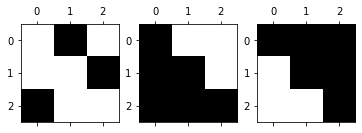

In [48]:
import scipy.linalg as spl # SciPy Linear Algebra Library
import matplotlib.pyplot as plt

P,L,U = spl.lu(A)

plt.subplot(1,3,1)
plt.spy(P)

plt.subplot(1,3,2)
plt.spy(L)

plt.subplot(1,3,3)
plt.spy(U)

print("norm(LU-A):")
print(np.linalg.norm(L@U-A))

print("norm(PLU-A):")
print(np.linalg.norm(P@L@U-A))

Permutation matrices use more memory than necessary since they are nothing but a row reorder of $L$.
We don't need a full matrix to represent this and instead can use indices for the permutation information: 

In [51]:
p, L, U = spl.lu(A)

One can reconstruct the permutation matrix from the indices by `print(np.eye(4)[p, :])`

In [52]:
P2 = np.eye(A.shape[0])[p, :]

IndexError: arrays used as indices must be of integer (or boolean) type

Let's see how pivoting affects the solution of the random linear system used in the example above.
We first determine the solution to the system $PLy = b$ and then we solve the system $Ux=y$

In [ ]:
plt.spy(L[p,:])